# elections 2019

In [2]:
import pandas as pd

In [3]:
import bs4
import requests


request = requests.get('https://www.drv.gov.ua/ords/portal/!cm_core.cm_index?option=ext_dvk&prejim=3')

soup = bs4.BeautifulSoup(request.content, 'lxml')

numbers = [a['href'].split('&')[1].split('=')[1] for a in soup.select('table a')]

polygons = [];
for number in numbers:
    i = requests.get(f"https://www.drv.gov.ua/ords/portal/gis$core.Gis_Okrug_Poly?p_id100={number}&ts=0.235428758430836")
    polygons.append(i.json())
    

In [5]:
feat = []
for d in polygons:
    feat += d['features']

In [7]:
total_json = {'type': 'FeatureCollection',
 'features':feat,
     'id': '1',
   'distr': '000001',
   'geomtype': '15'}

In [27]:
from geojson import Point, Feature, FeatureCollection, dump

with open('all_tvo.geojson', 'w') as f:
    dump(total_json, f, ensure_ascii=False)

In [25]:
! ls

2014_TVO_combine	      parl_2019.csv
all_tvo.geojson		      parliament_elections_2002.csv
combined_results_cleaned.csv  parliament_elections_2012.csv
combined_results.csv	      parliament_elections_2014.csv
data.tsv		      parse_cvk.py
directions.csv		      parties_2019
download_candidates.ipynb     parties_2019.csv
env			      polygons.geojson
f390736n181.xls		      polygons.json
for_2019_pred_unfinished.csv  predict_df.csv
get_polygons.js		      predicted_data_five.csv
h2o.ipynb		      predictions.csv
img			      pres_2019.tsv
iris.pdf		      previous_winners.csv
labels.tsv		      processing.ipynb
map			      requirements.txt
new_prediction.csv	      train_df.csv
node_modules		      tree.dot
package-lock.json


In [19]:
write_json(total_json)

TypeError: write_json() missing 1 required positional argument: 'features'

In [18]:
import pandas as pd

df = pd.read_csv('/home/ptrbdr/git/election_map_2019/voting_results/elections_t2.tsv', sep='\t', dtype={'tvo':'str'})

df_grouped = df[['ЗеленськийВолодимир','ПорошенкоПетро','oblast','tvo']].groupby(['oblast','tvo'], as_index=False).sum()



In [19]:
df_grouped['winner'] = ['z' if d else 'p' for d in df_grouped['ЗеленськийВолодимир'] > df_grouped['ПорошенкоПетро']]

In [153]:
df_grouped['winner'].value_counts()

z    184
p     15
Name: winner, dtype: int64

In [47]:
df_grouped.loc[df_grouped.tvo == '5', 'winner'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [158]:
data = data[0]

data['features'][0]['properties']['winner'] 

IndexError: list index out of range

In [170]:
data[0]['features'][0]['properties']['winner']

'd'

In [1]:
import json
with open('/home/ptrbdr/git/parliamentary_elections_2019/polygons.json', 'w') as f:
    json.dump(data, f)

NameError: name 'data' is not defined

In [156]:
for i, features in enumerate(data):
    for ii, feature in enumerate(features['features']):
        x = feature['properties']['id']
        if (len(df_grouped.loc[df_grouped.tvo == x, 'winner'].values) > 0):
            print('yes')
            data[i]['features'][ii]['properties']['winner'] = df_grouped.loc[df_grouped.tvo == x, 'winner'].values[0]
        else:
            print('no')
            data[i]['features'][ii]['properties']['winner'] = 'd'
        
        

no
no
no
no
no
no
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no


# download data

In [27]:
! pip install html5lib

  Using cached https://files.pythonhosted.org/packages/a5/62/bbd2be0e7943ec8504b517e62bab011b4946e1258842bc159e5dfde15b96/html5lib-1.0.1-py2.py3-none-any.whl
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
import bs4
import requests
import re
import pandas as pd

link = 'https://uk.wikipedia.org/wiki/%D0%92%D0%B5%D1%80%D1%85%D0%BE%D0%B2%D0%BD%D0%B0_%D0%A0%D0%B0%D0%B4%D0%B0_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8_IV_%D1%81%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0%D0%BD%D0%BD%D1%8F'



request = requests.get(link)
soup = bs4.BeautifulSoup(request.content, 'lxml')

# str(soup.select('table.wikitable.sortable')[0])

elections_2002 = pd.read_html(str(soup.select('table.wikitable.sortable')[0]))[0]
elections_2002 = elections_2002[~elections_2002['Область'].str.contains('округ')][['ПІБ','Партія', 'Область', '№ округу']]

elections_2002['year'] = '2002'
elections_2002.columns = ['deputat', 'partia', 'oblast', 'tvo', 'year']
elections_2002.tvo = '№' + elections_2002.tvo.astype('int').astype('str')


elections_2002.to_csv('parliament_elections_2002.csv', index=False)

In [23]:
elections_2002[elections_2002['ПІБ'].str.contains('Звягіль')]

,ПІБ,Партія,Область,№ округу
317,Звягільський Юхим Леонідович,Блок «За єдину Україну!»,Донецька область,43.0


In [5]:
import fuzzymatcher

In [32]:
# from fuzzymatcher import link_table, fuzzy_left_join
# pd.merge(elections_2002, elections_total, left_on='ПІБ', right_on='deputat', how='inner')

matched_2002 = fuzzymatcher.fuzzy_left_join(elections_2002,
                             elections_total_winner,
                             left_on='ПІБ',
                             right_on='deputat').sort_values('best_match_score', ascending=False)

In [ ]:
elections_total_winner[elections_total_winner.deputat.str.contains('Звягільський')]
elections_2002['ПІБ'].str.contains('Звягільський')

In [43]:
# matched_2002['best_match_score'].hist()


# matched_2002.loc[matched_2002.best_match_score > 0.2].groupby('year').count()
matched_2002.loc[(matched_2002.best_match_score > 0) & (matched_2002.year == 2014)]

,best_match_score,__id_left,__id_right,ПІБ,Партія,Область,№ округу,deputat,oblast,partia,perc_for,tvo,votes_for,year,winner
3894,0.310748,62_left,3207_right,Коновалюк Валерій Ілліч,Блок «За єдину Україну!»,Донецька область,62.0,Коновалюк Валерій Ілліч,Донецька область,самовисування,8.50,№59,2576.0,2014.0,False
1301,0.307491,21_left,2780_right,Бондар Володимир Налькович,Блок Віктора Ющенка «Наша Україна»,Волинська область,22.0,Бондар Володимир Налькович,Волинська область,"ПАРТІЯ ""БЛОК ПЕТРА ПОРОШЕНКА""",20.53,№20,21353.0,2014.0,False
10444,0.304615,184_left,5114_right,Давидова Людмила Іванівна,Самовисування,Харківська область,181.0,Давидова Людмила Іванівна,Харківська область,"Партія Сергія Тігіпка ""Сильна Україна""",3.34,№180,2010.0,2014.0,False
6592,0.303077,116_left,4005_right,Тополов Віктор Семенович,Самовисування,Луганська область,115.0,Тополов Віктор Семенович,Луганська область,самовисування,4.37,№107,906.0,2014.0,False
5123,0.286264,88_left,3616_right,Мойсик Володимир Романович,Блок Віктора Ющенка «Наша Україна»,Івано-Франківська область,87.0,Мойсик Володимир Романович,Івано-Франківська область,самовисування,1.18,№88,1126.0,2014.0,False
4185,0.285440,67_left,3292_right,Савицький Валентин Вікторович,Самовисування,Житомирська область,67.0,Савицький Валентин Вікторович,Житомирська область,самовисування,0.62,№64,503.0,2014.0,False
5122,0.284478,87_left,3558_right,Насалик Ігор Степанович,Блок Віктора Ющенка «Наша Україна»,Івано-Франківська область,86.0,Насалик Ігор Степанович,Івано-Франківська область,"ПАРТІЯ ""БЛОК ПЕТРА ПОРОШЕНКА""",52.05,№85,51569.0,2014.0,True
9991,0.282744,173_left,4967_right,Косінов Станіслав Анатолійович,Блок «За єдину Україну!»,Харківська область,170.0,Косінов Станіслав Анатолійович,Харківська область,самовисування,10.35,№169,7781.0,2014.0,False
1546,0.280554,26_left,4086_right,Сергієнко Леонід Григорович,Самовисування,Дніпропетровська область,27.0,Сергієнко Леонід Григорович,Луганська область,самовисування,9.58,№113,5019.0,2014.0,False
3289,0.279765,52_left,5002_right,Хомутиннік Віталій Юрійович,Блок «За єдину Україну!»,Донецька область,53.0,Хомутиннік Віталій Юрійович,Харківська область,самовисування,30.34,№171,19637.0,2014.0,True


In [160]:
def parse_tvo_results(d):    
    df = pd.read_html(str(d))
    df = df[7]

    tvo = d.find_all('font')[1].text.split(' ')[-1]
    obl = d.find_all('font')[2].text.strip()[1:-1]


    df.columns = df.iloc[0]
    df = df.iloc[1:,:].reset_index(drop=True)
    df.columns = ['candidat', 'graph', 'perc_for', 'votes_for']
    df = df[['candidat', 'perc_for', 'votes_for']]

    df['deputat'] = df['candidat'].str.split(',').str[0]
    df['partia'] = df['candidat'].str.split(',').str[1]
    df['tvo'] = tvo
    df['oblast'] = obl
    df.perc_for = df.perc_for.astype('float')
    df.votes_for = df.votes_for.str.split(' ').str.join('').astype('int')

    df = df[['deputat', 'partia', 'perc_for', 'votes_for', 'tvo', 'oblast']]
    return df



In [82]:
import bs4
import requests
import re
import pandas as pd


request = requests.get('https://www.cvk.gov.ua/pls/vnd2014/wp03952e6.html?PT001F01=910#')
soup = bs4.BeautifulSoup(request.content, 'lxml')

links = ['https://www.cvk.gov.ua/pls/vnd2014/' + d['href'] for d in soup.find_all('a', text=re.compile('ОВО'))]

soups = [bs4.BeautifulSoup(requests.get(d).content, 'lxml') for d in links]

data = pd.concat([parse_tvo_results(d) for d in soups])
data['year'] = '2014'

data.to_csv('parliament_elections_2014.csv', index=False)

In [100]:
import bs4
import requests
import re
import pandas as pd


request = requests.get('https://www.cvk.gov.ua/pls/vnd2012/wp039ad94.html?PT001F01=900')
soup = bs4.BeautifulSoup(request.content, 'lxml')

links = ['https://www.cvk.gov.ua/pls/vnd2012/' + d['href'] for d in soup.find_all('a', text=re.compile('ОВО'))]

soups = [bs4.BeautifulSoup(requests.get(d).content, 'lxml') for d in links]

data = pd.concat([parse_tvo_results(d) for d in soups])
data['year'] = '2012'

data.to_csv('parliament_elections_2012.csv', index=False)

# Model

In [370]:
# president elections 1 tour 
pres_2014 = pd.read_csv('https://raw.githubusercontent.com/OPORA/electiondata/master/election_results/president_2014_all_results.csv')
pres_2010 = pd.read_csv('https://raw.githubusercontent.com/OPORA/electiondata/master/election_results/President_2010_1_round.csv')

pres_2010_2 = pd.read_csv('https://raw.githubusercontent.com/OPORA/electiondata/master/election_results/president_2010_2_round.csv')

In [407]:
pres_2010

,PEC,location,Опис меж,1. Кількість виборців,2. Взяли участь,3. Недійсних бюлетенів,Богословська,Бродський,Гриценко,Костенко,...,Рябоконь,Симоненко,Супрун,Тимошенко,Тігіпко,Тягнибок,Ющенко,Янукович,Яценюк,4. Не підтр. жодного
0,1,"Театр естради, музична школа №1АР Крим, м. Сім...","Вулиці: Сєрова, Олександра Невського (Рози Люк...",1481,929,12,24,2,3,0,...,0,53,3,53,186,1,6,520,26,25
1,2,Кримський республіканський комітет ТСО України...,Вулиці: пр. Кірова з №1 по №9/12 (непарні №№) ...,2011,1248,8,12,0,8,0,...,0,73,0,107,218,6,12,719,35,28
2,3,"СШ № 14АР Крим, м. Сімферополь, вул. Караїмськ...",Вулиці: Некрасова з №7 по №27 (непарні №№) ; С...,2094,1348,33,18,0,11,2,...,1,57,0,125,238,9,13,735,42,38
3,4,"СШ № 14АР Крим, м. Сімферополь, вул. Караїмськ...",Вулиці: Тарвацького; Клари Цеткін; Училищна; К...,2681,1486,16,22,1,2,0,...,1,57,0,107,220,2,24,928,53,32
4,5,"Кримський економічний інститут КНЕУАР Крим, м....",Вулиці: Севастопольська з № 3/1 по № 29 (непар...,3122,2061,17,32,3,24,1,...,1,113,2,207,288,5,18,1163,81,58
5,6,"СШ № 21АР Крим, м. Сімферополь, вул. Красноарм...","Вулиці: Чехова з №35 до кінця (непарні №№), №3...",2078,1188,3,18,1,2,1,...,0,38,2,105,170,5,10,746,39,25
6,7,"СШ № 21АР Крим, м. Сімферополь, вул. Красноарм...",Вулиці: Жидкова; Черноморська; Комунальна; Бат...,2288,1157,13,27,0,13,1,...,1,50,2,137,207,2,17,614,24,25
7,8,"СШ № 21АР Крим, м. Сімферополь, вул. Красноарм...","Вулиці: 8-го Марта №83, з №95 до кінця (непарн...",1952,1168,12,14,1,3,2,...,1,35,1,100,146,1,11,751,40,29
8,9,"КП Кримської мехколони № 8АР Крим, м. Сімфероп...","Вулиці: Полігонна, Крилова з №110 до кінця (па...",2478,1379,29,35,0,5,0,...,0,41,0,136,173,2,10,883,32,13
9,10,"СШ № 26АР Крим, м. Сімферополь, вул. Тарабукін...",Вулиці: Археологічна (непарні №№); Бархатової ...,1429,911,30,19,0,11,0,...,0,37,1,87,122,5,9,548,21,13


In [374]:

melt_2014 = pd.melt(pres_2014, id_vars='PEC', value_vars=['Богомолець', 'Бойко',
       'Гриненко', 'Гриценко', 'Добкін', 'Клименко', 'Коновалюк', 'Кузьмін',
       'Куйбіда', 'Ляшко', 'Маломуж', 'Порошенко', 'Рабінович', 'Саранов',
       'Симоненко', 'Тимошенко', 'Тігіпко', 'Тягнибок', 'Цушко', 'Шкіряк',
       'Ярош'])
melt_2014

,PEC,variable,value
0,NaN,Богомолець,1
1,NaN,Богомолець,21
2,NaN,Богомолець,10
3,NaN,Богомолець,11
4,NaN,Богомолець,14
5,NaN,Богомолець,11
6,NaN,Богомолець,25
7,NaN,Богомолець,16
8,NaN,Богомолець,18
9,NaN,Богомолець,22


In [3]:
import pandas as pd
elections_2002 = pd.read_csv('parliament_elections_2002.csv')
elections_2012 = pd.read_csv('parliament_elections_2012.csv')
elections_2014 = pd.read_csv('parliament_elections_2014.csv')

### elections 2012

In [5]:
elections_2012['earlier_winner'] = elections_2012.deputat.str.strip().isin(elections_2002.deputat.str.strip())

In [6]:
elections_2012.loc[elections_2012.partia.str.contains('мовисування'),
                                     'partia'] = 'самовисування'
elections_2012.partia = elections_2012.partia.str.strip()

power_party = ['Блок «За єдину Україну!»', 'Партія регіонів',
#                'Комуністична партія України', 
               'ПАРТІЯ "БЛОК ПЕТРА ПОРОШЕНКА"', 'Політична партія "НАРОДНИЙ ФРОНТ"']
elections_2012['power'] = False

elections_2012.loc[elections_2012.partia.isin(power_party), 'power'] = True

elections_2012['self_proposition'] = False
elections_2012.loc[elections_2012.partia == 'самовисування',
                                     'self_proposition'] = True

In [7]:
max_result = elections_2012.groupby(['tvo']).perc_for.max().reset_index(name='max_result')
elections_2012_with_max = pd.merge(elections_2012, max_result, on='tvo', how='left')

elections_2012_with_max['winner'] = elections_2012_with_max.perc_for == elections_2012_with_max.max_result


### elections 2014

In [8]:
elections_2014['earlier_winner'] = elections_2014.deputat.str.strip().isin(elections_2012.deputat.str.strip())

elections_2014.loc[elections_2014.partia.str.contains('мовисування'),
                                     'partia'] = 'самовисування'
elections_2014.partia = elections_2014.partia.str.strip()

power_party = ['Блок «За єдину Україну!»', 'Партія регіонів',
#                'Комуністична партія України', 
               'ПАРТІЯ "БЛОК ПЕТРА ПОРОШЕНКА"', 'Політична партія "НАРОДНИЙ ФРОНТ"']
elections_2014['power'] = False

elections_2014.loc[elections_2014.partia.isin(power_party), 'power'] = True

elections_2014['self_proposition'] = False
elections_2014.loc[elections_2014.partia == 'самовисування',
                                     'self_proposition'] = True

max_result = elections_2014.groupby(['tvo']).perc_for.max().reset_index(name='max_result')
elections_2014_with_max = pd.merge(elections_2014, max_result, on='tvo', how='left')

elections_2014_with_max['winner'] = elections_2014_with_max.perc_for == elections_2014_with_max.max_result


# wrong direction

In [327]:
elections_total = pd.concat([elections_2012, elections_2014])
winners = elections_total.groupby(['tvo', 'year'], as_index=False).agg({'perc_for': 'max'})

t = pd.merge(elections_total, winners, 
         on=['tvo', 'year'], 
        how='outer')

t['winner'] = t.perc_for_x == t.perc_for_y
t = t[['deputat', 'oblast', 'partia', 'perc_for_x', 'tvo', 'votes_for', 'year','winner']]
elections_total_winner = t.rename(columns={'perc_for_x': 'perc_for'})

# dummy = pd.get_dummies(elections_total_winner[['deputat', 'partia', 'tvo', 'year',]],
#                        prefix=['deputat', 'partia', 'tvo'])



/home/ptrbdr/git/parliamentary_elections_2019/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [328]:
elections_total_winner
elections_2002['winner'] = True
elections_total_winner = pd.concat([elections_total_winner, elections_2002])



/home/ptrbdr/git/parliamentary_elections_2019/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
elections_total_winner.deputat = elections_total_winner.deputat.str.strip()

In [104]:
dep_freq = elections_total_winner[['deputat', 'tvo', 'partia', 'oblast']].groupby(['deputat', 'oblast'], as_index=False)\
    .size().reset_index(name='dep_freq').sort_values('dep_freq', ascending=False)

In [105]:
elections_total_winner_with_freq = pd.merge(elections_total_winner,dep_freq, on='deputat', how='left')
elections_total_winner_with_freq

,deputat,oblast_x,partia,perc_for,tvo,votes_for,winner,year,oblast_y,dep_freq
0,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.76,№1,27937.0,True,2012,Автономна Республіка Крим,1
1,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.98,№1,12960.0,False,2012,Автономна Республіка Крим,1
2,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.58,№1,7630.0,False,2012,Автономна Республіка Крим,1
3,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.12,№1,6575.0,False,2012,Автономна Республіка Крим,1
4,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.71,№1,4838.0,False,2012,Автономна Республіка Крим,1
5,Лобачев Сергій Миколайович,Автономна Республіка Крим,"політична партія Всеукраїнське об’єднання ""Ба...",6.22,№1,4485.0,False,2012,Автономна Республіка Крим,1
6,Семенова Лариса Іванівна,Автономна Республіка Крим,Партія Зелених України,2.28,№1,1646.0,False,2012,Автономна Республіка Крим,1
7,Толкачов Володимир Володимирович,Автономна Республіка Крим,"Партія Наталії Королевської ""Україна – Вперед!""",1.55,№1,1119.0,False,2012,Автономна Республіка Крим,1
8,Пузако Володимир Іванович,Автономна Республіка Крим,"Українська партія ""Зелена планета""",1.17,№1,847.0,False,2012,Автономна Республіка Крим,1
9,Волков Олександр Петрович,Автономна Республіка Крим,самовисування,0.88,№1,635.0,False,2012,Автономна Республіка Крим,1


In [106]:
tvo_freq = elections_total_winner_with_freq.groupby(['tvo','year']).size().reset_index(name='tvo_freq')
elections_total_winner_with_freq = pd.merge(elections_total_winner_with_freq,tvo_freq[['tvo', 'tvo_freq']], on='tvo', how='left')
elections_total_winner_with_freq


,deputat,oblast_x,partia,perc_for,tvo,votes_for,winner,year,oblast_y,dep_freq,tvo_freq
0,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.76,№1,27937.0,True,2012,Автономна Республіка Крим,1,1
1,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.76,№1,27937.0,True,2012,Автономна Республіка Крим,1,20
2,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.98,№1,12960.0,False,2012,Автономна Республіка Крим,1,1
3,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.98,№1,12960.0,False,2012,Автономна Республіка Крим,1,20
4,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.58,№1,7630.0,False,2012,Автономна Республіка Крим,1,1
5,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.58,№1,7630.0,False,2012,Автономна Республіка Крим,1,20
6,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.12,№1,6575.0,False,2012,Автономна Республіка Крим,1,1
7,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.12,№1,6575.0,False,2012,Автономна Республіка Крим,1,20
8,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.71,№1,4838.0,False,2012,Автономна Республіка Крим,1,1
9,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.71,№1,4838.0,False,2012,Автономна Республіка Крим,1,20


In [107]:
tvo_freq_mean = elections_total_winner_with_freq.loc[elections_total_winner_with_freq.tvo_freq > 1,
                                                     'tvo_freq'].mean()
dep_freq_mean = elections_total_winner_with_freq.loc[elections_total_winner_with_freq.dep_freq > 1,
                                                     'dep_freq'].mean()
mean_perc_for = elections_total_winner_with_freq.loc[(elections_total_winner_with_freq.winner == True),
                                                     'perc_for'].mean()


elections_total_winner_with_freq.loc[elections_total_winner_with_freq.tvo_freq == 1,
                                                     'tvo_freq'] = tvo_freq_mean

elections_total_winner_with_freq.loc[elections_total_winner_with_freq.dep_freq == 1,
                                                     'dep_freq'] = dep_freq_mean
elections_total_winner_with_freq.loc[(elections_total_winner_with_freq.perc_for.isnull()),
                                     'perc_for'] = mean_perc_for

In [108]:
elections_total_winner_with_freq

,deputat,oblast_x,partia,perc_for,tvo,votes_for,winner,year,oblast_y,dep_freq,tvo_freq
0,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.760000,№1,27937.0,True,2012,Автономна Республіка Крим,2.091303,15.307662
1,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.760000,№1,27937.0,True,2012,Автономна Республіка Крим,2.091303,20.000000
2,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.980000,№1,12960.0,False,2012,Автономна Республіка Крим,2.091303,15.307662
3,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.980000,№1,12960.0,False,2012,Автономна Республіка Крим,2.091303,20.000000
4,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.580000,№1,7630.0,False,2012,Автономна Республіка Крим,2.091303,15.307662
5,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.580000,№1,7630.0,False,2012,Автономна Республіка Крим,2.091303,20.000000
6,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.120000,№1,6575.0,False,2012,Автономна Республіка Крим,2.091303,15.307662
7,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.120000,№1,6575.0,False,2012,Автономна Республіка Крим,2.091303,20.000000
8,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.710000,№1,4838.0,False,2012,Автономна Республіка Крим,2.091303,15.307662
9,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.710000,№1,4838.0,False,2012,Автономна Республіка Крим,2.091303,20.000000


In [109]:
mean_perc_for = elections_total_winner_with_freq.groupby('deputat')['perc_for']\
    .mean().reset_index(name='mean_perc_for')

elections_total_winner_with_freq = pd.merge(elections_total_winner_with_freq, mean_perc_for, on='deputat', how='left')

In [110]:
elections_total_winner_with_freq.loc[elections_total_winner_with_freq.partia.str.contains('мовисування'),
                                     'partia'] = 'самовисування'
elections_total_winner_with_freq.partia = elections_total_winner_with_freq.partia.str.strip()

power_party = ['Блок «За єдину Україну!»', 'Партія регіонів',
               'Комуністична партія України', 
               'ПАРТІЯ "БЛОК ПЕТРА ПОРОШЕНКА"', 'Політична партія "НАРОДНИЙ ФРОНТ"']
elections_total_winner_with_freq['power'] = False

elections_total_winner_with_freq.loc[elections_total_winner_with_freq.partia.isin(power_party), 'power'] = True

elections_total_winner_with_freq['self_proposition'] = False
elections_total_winner_with_freq.loc[elections_total_winner_with_freq.partia == 'самовисування',
                                     'self_proposition'] = True

In [114]:
mean_vote = elections_total_winner_with_freq.groupby(['tvo', 'year'])['perc_for'].mean().reset_index(name='mean_vote')
elections_total_winner_with_freq = pd.merge(elections_total_winner_with_freq, mean_vote, on=['tvo', 'year'], how='left')

In [115]:
elections_total_winner_with_freq['votes_to_mean_ratio'] = elections_total_winner_with_freq.perc_for/elections_total_winner_with_freq.mean_vote

In [220]:
old_results = elections_total_winner_with_freq.loc[elections_total_winner_with_freq.year < 2014].copy()
new_results = elections_total_winner_with_freq.loc[elections_total_winner_with_freq.year == 2014].copy()

i = pd.merge(new_results, old_results[['deputat', 'tvo', 'perc_for']], on=['deputat', 'tvo'], how='left')

winners = i[~i.perc_for_y.isnull()].drop_duplicates('deputat')
loosers = i[i.perc_for_y.isnull()].drop_duplicates('deputat')

In [235]:
shorter_dataset = pd.concat([winners, loosers])
shorter_dataset = shorter_dataset.fillna(0)

In [288]:
elections_total_winner.loc[elections_total_winner.year == 2012].copy()

,deputat,oblast,partia,perc_for,tvo,votes_for,year,winner
0,Дзоз Віталіна Олексіївна,Автономна Республіка Крим,Партія регіонів,38.76,№1,27937,2012,True
1,Грач Леонід Іванович,Автономна Республіка Крим,самовисування,17.98,№1,12960,2012,False
2,Соломахін Олег Андрійович,Автономна Республіка Крим,Комуністична партія України,10.58,№1,7630,2012,False
3,Аксенов Сергій Валерійович,Автономна Республіка Крим,"Політична партія ""Руська Єдність""",9.12,№1,6575,2012,False
4,Доценко Сергій Миколайович,Автономна Республіка Крим,"Політична партія ""УДАР (Український Демократи...",6.71,№1,4838,2012,False
5,Лобачев Сергій Миколайович,Автономна Республіка Крим,"політична партія Всеукраїнське об’єднання ""Ба...",6.22,№1,4485,2012,False
6,Семенова Лариса Іванівна,Автономна Республіка Крим,Партія Зелених України,2.28,№1,1646,2012,False
7,Толкачов Володимир Володимирович,Автономна Республіка Крим,"Партія Наталії Королевської ""Україна – Вперед!""",1.55,№1,1119,2012,False
8,Пузако Володимир Іванович,Автономна Республіка Крим,"Українська партія ""Зелена планета""",1.17,№1,847,2012,False
9,Волков Олександр Петрович,Автономна Республіка Крим,самовисування,0.88,№1,635,2012,False


# classification

In [10]:
elections = pd.concat([elections_2012_with_max, elections_2014_with_max])

/home/ptrbdr/git/parliamentary_elections_2019/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
elections[elections.deputat.str.contains('Клімов')]
elections[elections.tvo.str.contains('№137')]

,deputat,earlier_winner,max_result,oblast,partia,perc_for,power,self_proposition,tvo,votes_for,winner,year
1564,Клімов Леонід Михайлович,True,48.46,Одеська область,Партія регіонів,48.46,True,False,№137,36807,True,2012
1565,Сорока Віктор Петрович,False,48.46,Одеська область,"політична партія Всеукраїнське об’єднання ""Сво...",15.82,False,False,№137,12014,False,2012
1566,Кіріца Юрій Іванович,False,48.46,Одеська область,"Політична партія ""УДАР (Український Демократич...",11.85,False,False,№137,9005,False,2012
1567,Сокерчак В’ячеслав Михайлович,False,48.46,Одеська область,Комуністична партія України,10.50,False,False,№137,7980,False,2012
1568,Салтановський Микола Васильович,False,48.46,Одеська область,Соціалістична партія України,8.72,False,False,№137,6629,False,2012
1569,Мадон Ігор Іванович,False,48.46,Одеська область,"Політична партія Українська платформа ""СОБОР""",2.31,False,False,№137,1755,False,2012
1570,Мартинюк Сергій Яковлевич,False,48.46,Одеська область,Українська Народна Партія,2.30,False,False,№137,1750,False,2012
1793,Клімов Леонід Михайлович,True,30.88,Одеська область,самовисування,30.88,False,True,№137,17935,True,2014
1794,Понепалюк Валерій Васильович,False,30.88,Одеська область,"ПАРТІЯ ""БЛОК ПЕТРА ПОРОШЕНКА""",24.43,True,False,№137,14191,False,2014
1795,Поживанов Михайло Олександрович,False,30.88,Одеська область,самовисування,14.05,False,True,№137,8163,False,2014


In [15]:
# elections.power.astype(int)
elections[['deputat', 'winner', 'year', 'oblast', 'tvo']].to_csv('labels.tsv', index=False, sep='\t')
# pd.get_dummies(elections[['power', 'self_proposition', 'oblast', 'tvo', 'earlier_winner']]).to_csv('data.tsv',
#                                                                                             index=False, sep='\t')

In [333]:
elections_short = pd.concat([elections.loc[elections.winner == True], elections.loc[elections.winner == False].sample(frac=0.1)])



In [334]:
 dummy = pd.get_dummies(elections_short[['tvo', 'oblast','earlier_winner', 'power', 'self_proposition', 'year']])

In [335]:
from sklearn import preprocessing

x = dummy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

labels = elections_short.winner

# year




In [336]:
from sklearn.tree import DecisionTreeClassifier

import sklearn.tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(df, labels, 
                                                          test_size=0.2, 
                                                          stratify=labels,
                                                          random_state=1)

dt = DecisionTreeClassifier(max_depth=3, random_state=1)
X_train = pd.DataFrame(X_train.values, columns = dummy.columns)

In [337]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [338]:
y_pred = dt.predict(X_test)
accuracy_score(y_test.values, y_pred)



0.8350515463917526

In [339]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)


array([[100,  23],
       [  9,  62]])

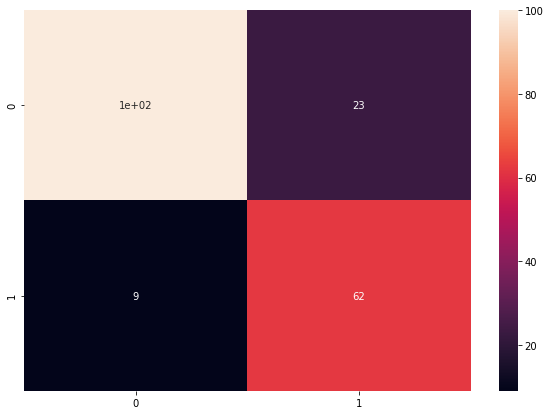

In [340]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [341]:
import sklearn.tree

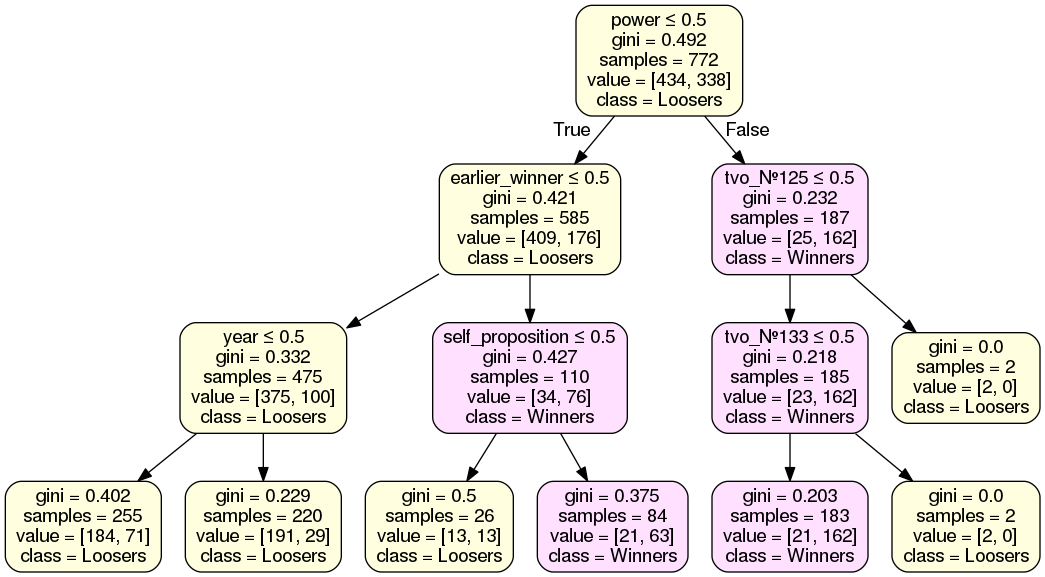

In [352]:
# https://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn 
# here how we got it

from IPython.display import Image  
dot_data = sklearn.tree.export_graphviz(dt.fit(X_train,y_train), out_file=None,  
                     feature_names=X_train.columns,  
                     class_names=['Loosers','Winners'],  
                     filled=True, rounded=True,  # leaves_parallel=True, 
                     special_characters=True)  
graph2 = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph2.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; # print(values)
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); # print(color)
        node.set_fillcolor(color )
#

Image(graph2.create_png() ) 

In [343]:
results = elections_short
results['prediction'] = dt.predict(dummy)

In [418]:
# results.loc[(results.winner == True) & (results.prediction == False)].partia.value_counts()
len(results.loc[(results.winner == False) & (results.prediction == False)])

492

In [348]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification

>>>

>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = RandomForestClassifier(n_estimators=100, max_depth=2,
...                              random_state=0)
>>> clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [349]:
y_pred = dt.predict(X_test)
accuracy_score(y_test.values, y_pred)



0.8350515463917526

In [350]:
full = elections
full['results'] = dt.predict(pd.get_dummies(elections[['tvo', 'oblast','earlier_winner', 'power', 'self_proposition', 'year']]))
full.loc[(full.winner == False) & (full.results == True)].partia.value_counts()


# len(full.loc[(full.winner == True) & (full.results == True)])
# len(full.loc[(full.winner == False) & (full.results == False)])
# len(full.loc[(full.winner == True) & (full.results == False)])


самовисування                        227
Політична партія "НАРОДНИЙ ФРОНТ"    100
Партія регіонів                       87
ПАРТІЯ "БЛОК ПЕТРА ПОРОШЕНКА"         71
Name: partia, dtype: int64

In [290]:
pd.concat([pd.Series(clf.feature_importances_),pd.Series(dummy.columns)], axis=1).sort_values(0, ascending=False)

,0,1
1,0.166176,power
2,0.115576,self_proposition
0,0.086003,earlier_winner
3,0.036345,year
226,0.026530,tvo_№97
233,0.024672,oblast_Дніпропетровська область
125,0.020980,tvo_№208
254,0.019061,oblast_м.Київ
189,0.016956,tvo_№63
242,0.014782,oblast_Миколаївська область


# logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial').fit(X_train, y_train)

In [80]:
y_pred = clf.predict(X_test)
accuracy_score(y_test.values, y_pred)




1.0

In [98]:
pd.concat([pd.Series(X_train.columns), pd.Series(clf.coef_[0])],
          axis=1).reset_index(drop=True).sort_values(1, ascending=False)


,0,1
0,number_of_candidates,5.158430
28,"partia_ ПАРТІЯ ""БЛОК ПЕТРА ПОРОШЕНКА""",0.156563
46,"partia_ Політична партія ""НАРОДНИЙ ФРОНТ""",0.086365
21,oblast_Хмельницька область,0.085071
64,partia_ політична партія Всеукраїнське об’єдна...,0.076402
26,partia_ Комуністична партія України,0.074444
3,oblast_Вінницька область,0.068373
22,oblast_Черкаська область,0.055676
8,oblast_Запорізька область,0.044946
2,oblast_Волинська область,0.041274
